## Import

In [5]:
# 필요 라이브러리 import

import soundfile
import IPython
import matplotlib.pyplot as plt

## 사운드파일 불러오기

In [6]:
# 사운드파일 불러오기

soundfile_path = './iloveyou_kakao.mp3'
sound, sampling_rate = soundfile.read(soundfile_path)

## sound = 사운드파일의 강도를 담은 배열
## sampling_rate = 재생 속도

In [7]:
# 불러온 사운드파일 들어보기
IPython.display.Audio(sound, rate = sampling_rate)

## 역위상 음원 만들기

In [8]:
# 역위상 음원 만들기

sound_reverse = sound * (-1)

In [9]:
# 역위상 음원 들어보기
IPython.display.Audio(sound_reverse, rate = sampling_rate)

## 원음과 역위상 음원 그래프로 비교

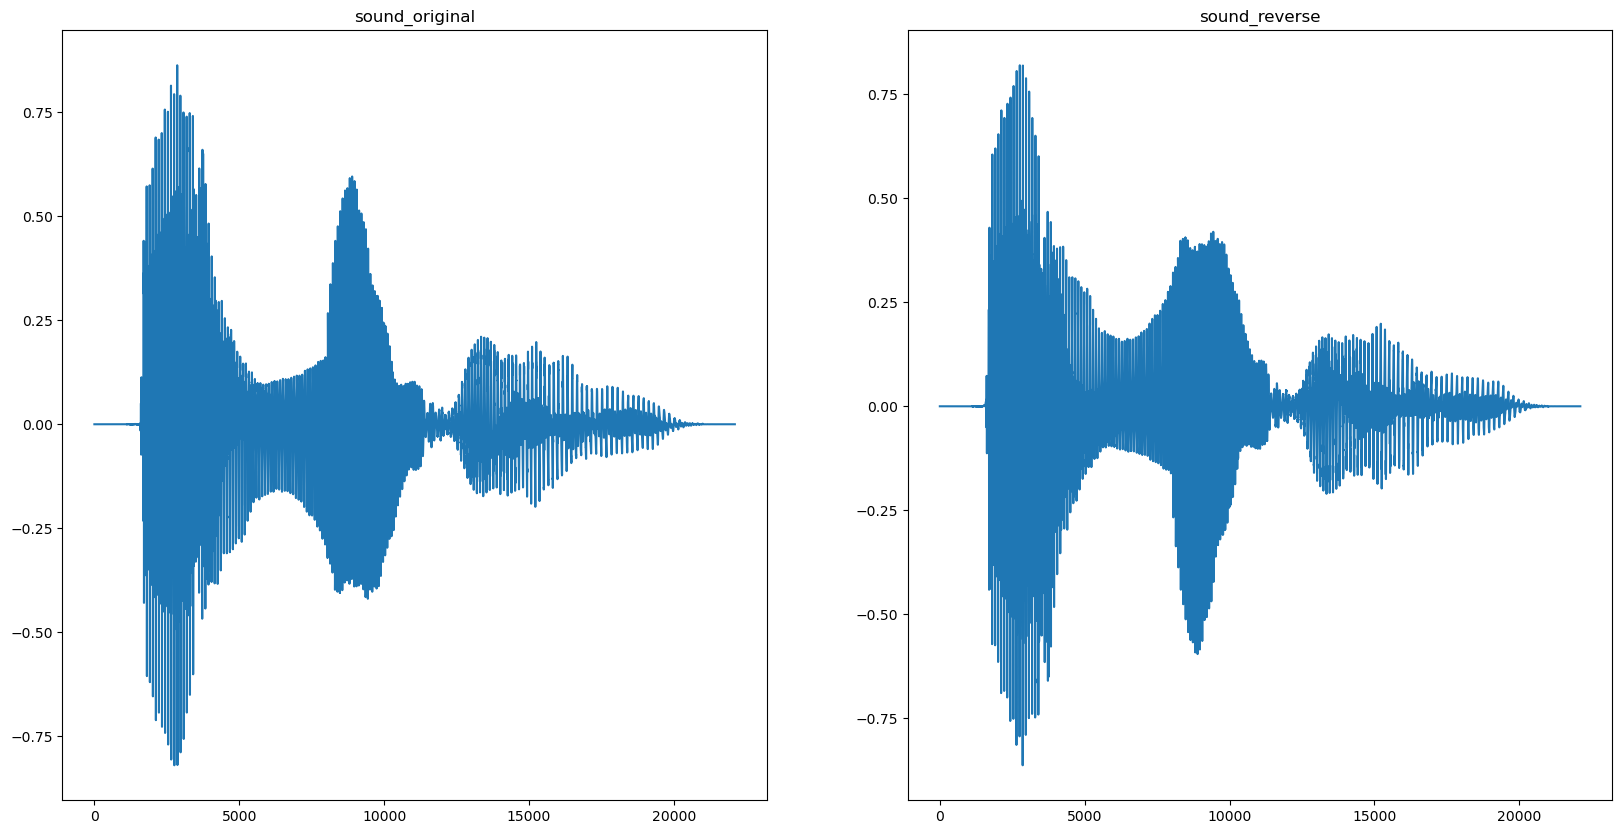

In [10]:
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.plot(range(len(sound)), sound)
plt.title('sound_original')
plt.subplot(1, 2, 2)
plt.plot(range(len(sound_reverse)), sound_reverse)
plt.title('sound_reverse')
plt.show()

# 어라 -1을 곱했는데 음성도 동일하게 나오고, 그래프도 비슷하네..??

음성은 1과 -1 범위 내에서 진동한다는 특징이 있죠.  

즉 이는, -1일 곱한다고 하더라도 강도를 그저 음수로 표현했을 뿐,  
동일한 파워의 진동을 가지고 있게 됩니다.  
그래서 들리는 소리 자체는 동일하게 들리는 게 아닐까 추측합니다.

시각화 그래프는 언뜻 보면 비슷하게 생겼지만, 확대해서 보면 다릅니다.  
아래에서 보실 수 있습니다.

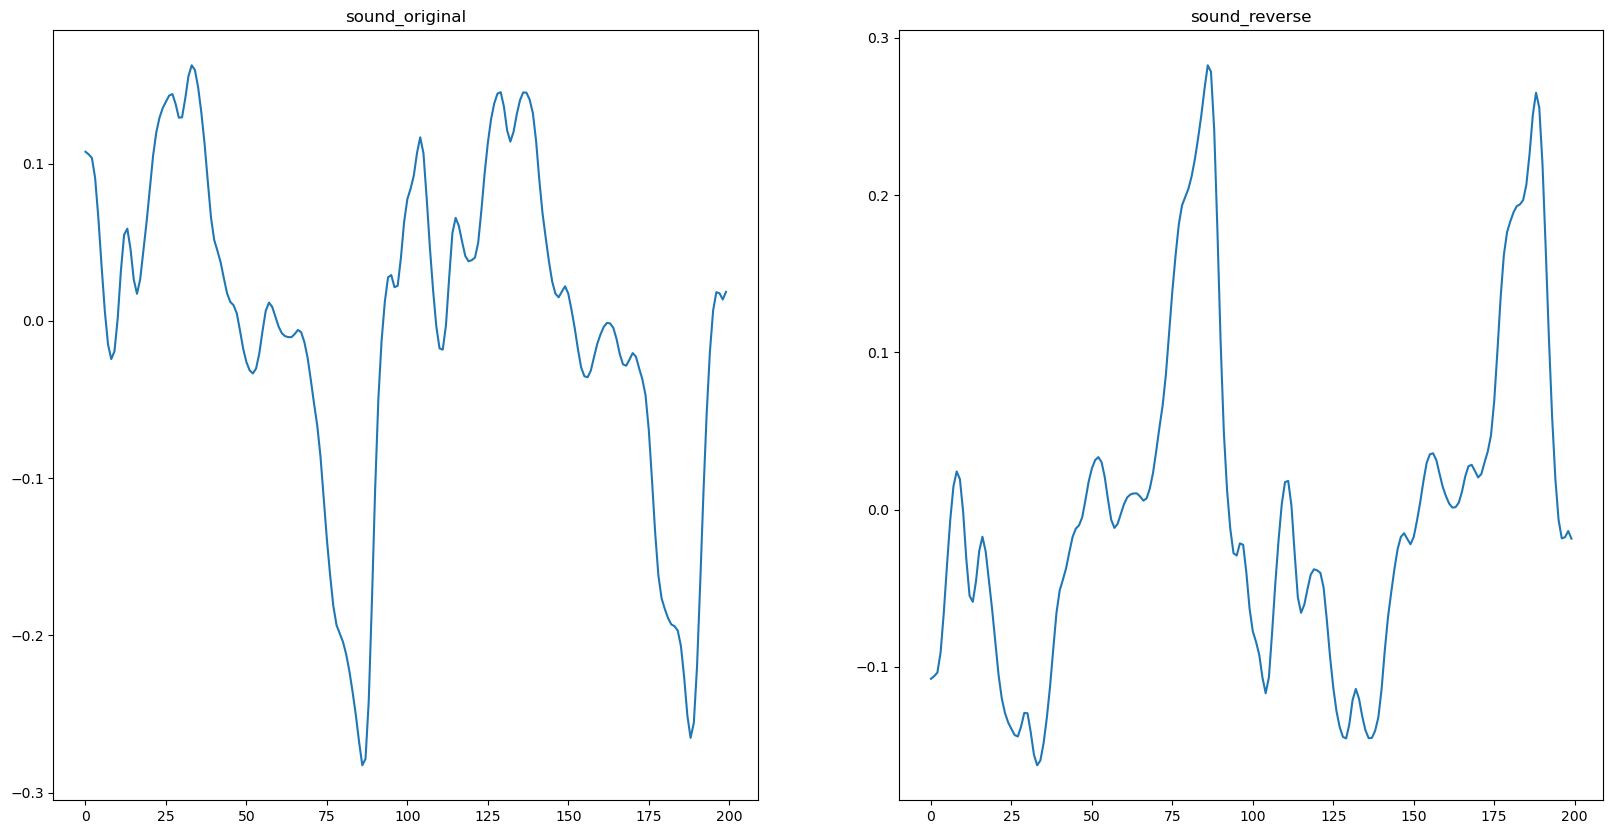

In [11]:
# 5000 ~ 5200 부분만 그래프로 그려보기

start = 5000
end = 5200

plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.plot(range(len(sound[start:end])), sound[start:end])
plt.title('sound_original')
plt.subplot(1, 2, 2)
plt.plot(range(len(sound_reverse[start:end])), sound_reverse[start:end])
plt.title('sound_reverse')
plt.show()

## 노이즈캔슬링

In [12]:
# 사운드파일 불러오기, 역위상 음원 만들기 (위에서 했던 작업)

soundfile_path = './iloveyou_kakao.mp3'
sound, sampling_rate = soundfile.read(soundfile_path)
sound_reverse = sound * (-1)

In [13]:
# 원 사운드와 역위상 음원 더하기

noise_canceling = sound + sound_reverse

In [14]:
# 들어보기 (원음)

IPython.display.Audio(sound, rate = sampling_rate)

In [15]:
# 들어보기 (역위상 음원)

IPython.display.Audio(sound_reverse, rate = sampling_rate)

In [16]:
# 들어보기 (노이즈캔슬링)

IPython.display.Audio(noise_canceling, rate = sampling_rate)

/Users/jongya/miniforge3/envs/jh/lib/python3.8/site-packages/IPython/lib/display.py:187: RuntimeWarning: invalid value encountered in divide
  scaled = data / normalization_factor * 32767
/Users/jongya/miniforge3/envs/jh/lib/python3.8/site-packages/IPython/lib/display.py:188: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


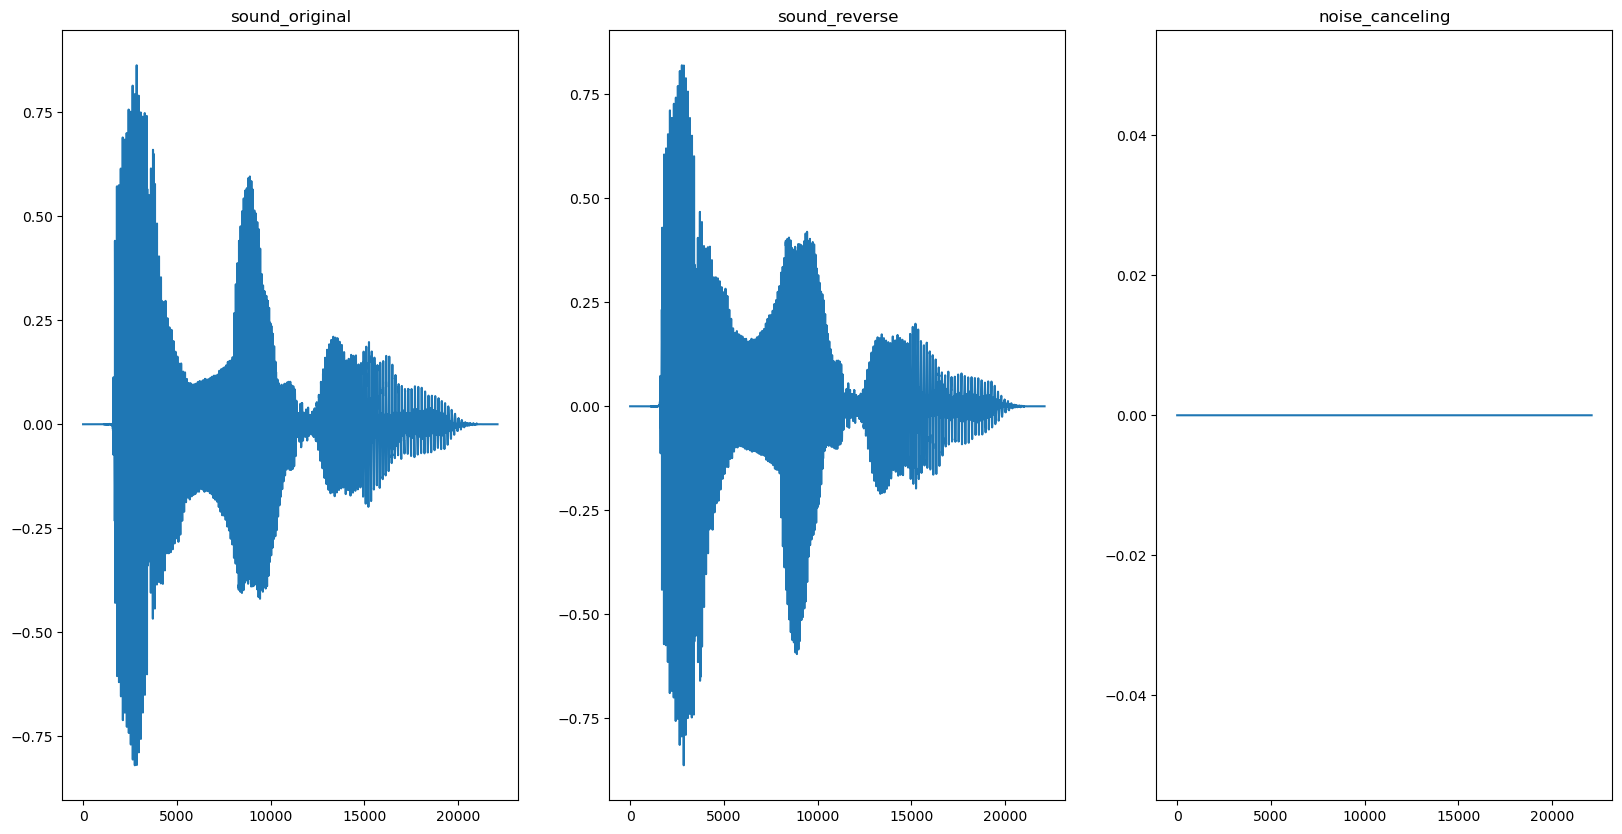

In [17]:
# 그래프 보기

plt.figure(figsize = (20, 10))
plt.subplot(1, 3, 1)
plt.plot(range(len(sound)), sound)
plt.title('sound_original')
plt.subplot(1, 3, 2)
plt.plot(range(len(sound_reverse)), sound_reverse)
plt.title('sound_reverse')
plt.subplot(1, 3, 3)
plt.plot(range(len(noise_canceling)), noise_canceling)
plt.title('noise_canceling')
plt.show()

In [19]:
# 음원 export

soundfile.write('/Users/jongya/Desktop/sound_origin.wav', sound, sampling_rate)
soundfile.write('/Users/jongya/Desktop/sound_reverse.wav', sound_reverse, sampling_rate)
soundfile.write('/Users/jongya/Desktop/noise_canceling.wav', noise_canceling, sampling_rate)